<h1><b>Titanic Survival Analysis</h1>
<b>Introductory Paragraph:</b>
In this project, we analyze the Titanic dataset to explore the factors that influenced passenger survival. Using Python libraries such as Pandas, Seaborn, and Matplotlib, we clean and process the data, handle missing values, and create visualizations. The analysis focuses on survival rates by gender, age groups, and passenger class, along with correlation heatmaps to uncover patterns between different features. This project aims to provide clear insights into how social and economic factors impacted survival chances during the Titanic disaster.
<br><b>Project Objective:</b>
The objective of this project is to identify and visualize key factors that influenced passenger survival on the Titanic, focusing on gender, age, class, and fare, by applying data analysis and visualization techniques in Python.

### Set Up Environment

In [60]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading and Explore the Data

In [61]:
df = pd.read_csv('Titanic-Dataset.csv')
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

### Check missing values

In [62]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Preprocess
1: Droping irrelevant columns 
<br>2: Handle missing values in Age

In [63]:
df = df.drop(columns=['PassengerId','Name','Cabin','Ticket'])

In [64]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\HIZBO\AppData\Local\Temp\ipykernel_5364\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


<h2><b>Analysis</b></h2>
<b>1: Survival by Gender

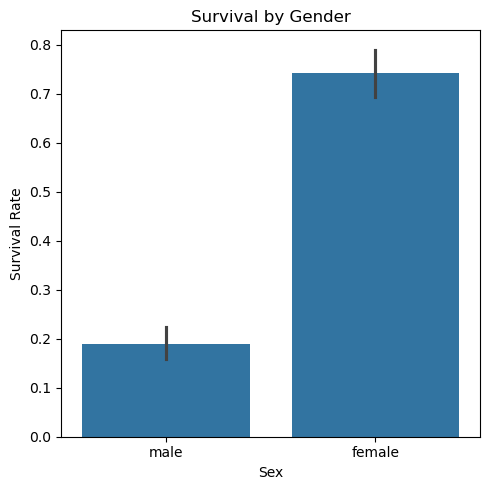

In [65]:
plt.figure(figsize=(5,5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

<b>2: Survival by Age

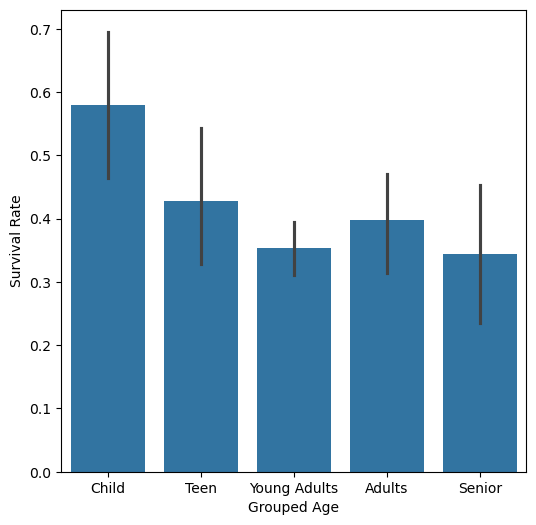

In [66]:
#creatig age bins
plt.figure(figsize=(6,6))
df['GroupedAge'] = pd.cut(df['Age'], bins=[0,12,18,35,50,80], labels=['Child','Teen','Young Adults','Adults','Senior'])
sns.barplot(x='GroupedAge', y='Survived', data=df)
plt.xlabel('Grouped Age')
plt.ylabel('Survival Rate')
plt.tight_layout
plt.show()

<b>3: Survival by Class 

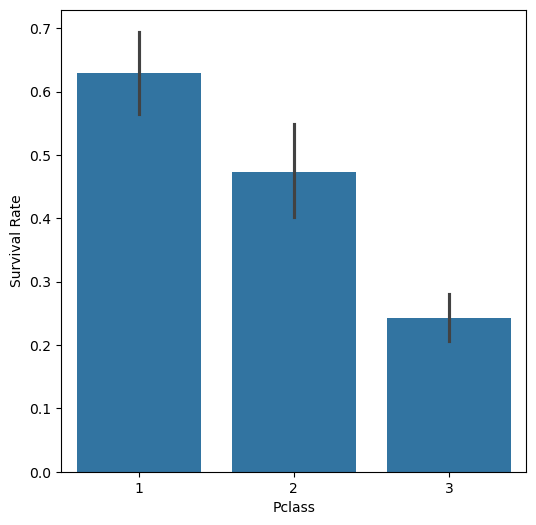

In [67]:
plt.figure(figsize=(6,6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.tight_layout
plt.show()

<h2><b> Heatmap (Correlation) for numeric columns only

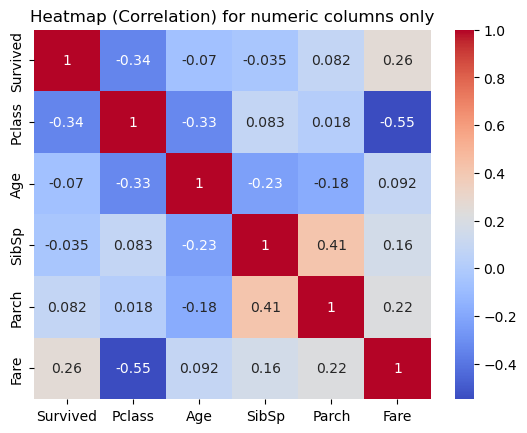

In [94]:
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap (Correlation) for numeric columns only')
plt.tight_layout
plt.savefig("Heatmap (Correlation) for numeric columns only.png")
plt.show()

<h2><b> Combine Gender + Class Heatmap 

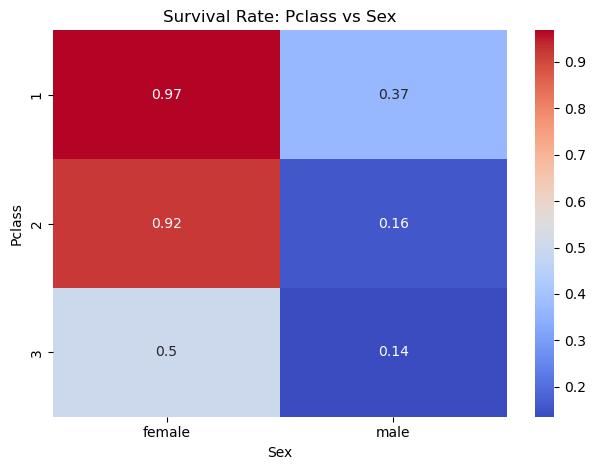

In [95]:
sns.heatmap(survival_rate, annot=True, cmap="coolwarm")
plt.title("Survival Rate: Pclass vs Sex")
plt.xlabel('Sex')
plt.ylabel('Pclass')
plt.tight_layout()
plt.show()

<h2> <b>Summary of Titanic Survival Based on Graphs and Heatmaps</b></h2>

1: Barplot – Survival by Gender:
Female passengers survived more than male passengers.

2: Barplot – Survival by Age:
Children survived the most compared to all other age groups, while seniors had the lowest survival rate. Overall, children survived more than teens, teens survived more than young adults, adults survived more than young adults, and seniors had the least survival among all age groups.

3: Barplot – Survival by Class:
Passengers in Class 1 had the highest survival rate, followed by Class 2, while Class 3 had the lowest.

4: Heatmap – Correlation (Numeric Columns Only):

    . Survival was higher among 1st class passengers and those who paid higher fares.

    . Survival was not strongly related to age.

    . Passenger class and fare were strongly linked (wealthier passengers in 1st class paid higher fares).

    . Family features (SibSp and Parch) were moderately correlated with each other.

    . In short: wealthy passengers (1st class, higher fare) survived more, while poorer passengers (3rd class, lower fare) survived less.

5: Heatmap – Combined Gender + Class:
Within each class, female passengers had higher survival rates than male passengers.

In [96]:
df.to_csv('Cleaned Titanic Dataset After Analysis.csv', index=False)
print("Both Analysis and Cleaned Data are done")

Both Analysis and Cleaned Data are done
